# Results of Cramming NanoGPT

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import tueplots
from tueplots import bundles
from tueplots.constants.color import rgb
from tueplots import fonts, fontsizes



## Just generating the batch size schedules

In [2]:
sec_per_day = 79200

def get_acc_timed(tp):
    if tp / sec_per_day < acc_warmup:
        return min_acc
    if tp / sec_per_day > acc_increase:
        return max_acc
    ratio = (tp / sec_per_day - acc_warmup) / (acc_increase - acc_warmup)
    assert 0 <= ratio <= 1
    return int(np.ceil(min_acc + ratio * (max_acc - min_acc)))


bs_1_32_0_25 = np.zeros(sec_per_day)
sec_per_day = 79200
min_acc = 1
max_acc = 32
acc_increase = 0.25
acc_warmup = 0

for i in range(sec_per_day):
    bs_1_32_0_25[i] = get_acc_timed(i)


bs_1_32_0_0 = np.zeros(sec_per_day)
sec_per_day = 79200
min_acc = 1
max_acc = 32
acc_increase = 1
acc_warmup = 0

for i in range(sec_per_day):
    bs_1_32_0_0[i] = get_acc_timed(i)


bs_1_128_0_0 = np.zeros(sec_per_day)
sec_per_day = 79200
min_acc = 1
max_acc = 128
acc_increase = 1
acc_warmup = 0

for i in range(sec_per_day):
    bs_1_128_0_0[i] = get_acc_timed(i)


bs_1_1_0_0 = np.zeros(sec_per_day)
sec_per_day = 79200
min_acc = 1
max_acc = 1
acc_increase = 1
acc_warmup = 0

for i in range(sec_per_day):
    bs_1_1_0_0[i] = get_acc_timed(i)


bs_32_32_0_0 = np.zeros(sec_per_day)
sec_per_day = 79200
min_acc = 32 
max_acc = 32
acc_increase = 1
acc_warmup = 0

for i in range(sec_per_day):
    bs_32_32_0_0[i] = get_acc_timed(i)


bs_32_32_05_0 = np.zeros(sec_per_day)
sec_per_day = 79200
min_acc = 1 
max_acc = 32
acc_increase = 1
acc_warmup = 0.5

for i in range(sec_per_day):
    bs_32_32_05_0[i] = get_acc_timed(i)


bs_1_16_0_0 = np.zeros(sec_per_day)
sec_per_day = 79200
min_acc = 1 
max_acc = 16
acc_increase = 1
acc_warmup = 0

for i in range(sec_per_day):
    bs_1_16_0_0[i] = get_acc_timed(i)


bs_1_16_0_05 = np.zeros(sec_per_day)
sec_per_day = 79200
min_acc = 1
max_acc = 16
acc_increase = 0.5
acc_warmup = 0

for i in range(sec_per_day):
    bs_1_16_0_05[i] = get_acc_timed(i)


In [3]:
# df_minacc_maxacc_accwarmup_minibatchsize_contextsize_maxlr_seed
df_1_1_0_12_512_0006_5 = pd.read_csv("results/df_1_1_0_12_512_0006_5.csv")
df_320_320_0_4_1024_0006_5 = pd.read_csv("results/df_320_320_0_4_1024_0006_5.csv")
df_32_32_0_12_512_0006_5 = pd.read_csv("results/df_32_32_0_12_512_0006_5.csv")
df_320_320_0_4_1024_0001_5 = pd.read_csv("results/df_320_320_0_4_1024_0001_5.csv")
df_320_320_0_4_1024_001_5 = pd.read_csv("results/df_320_320_0_4_1024_001_5.csv")
df_320_320_0_12_512_0006_5 = pd.read_csv("results/df_320_320_0_12_512_0006_5.csv")
# df_minacc_maxacc_accwarmup_accincrease_minibatchsize_contextsize_maxlr_seed
df_1_128_0_4_1024_0006_5 = pd.read_csv("results/df_1_128_0_4_1024_0006_5.csv")
df_1_32_0_4_1024_0006_5 = pd.read_csv("results/df_1_32_0_4_1024_0006_5.csv")
df_32_32_0_4_1024_0006_5 = pd.read_csv("results/df_32_32_0_4_1024_0006_5.csv")
df_1_1_0_4_1024_0006_5 = pd.read_csv("results/df_1_1_0_4_1024_0006_5.csv")
df_1_32_05_4_1024_0006_6 = pd.read_csv("results/df_1_32_05_4_1024_0006_6.csv")
df_1_32_0_025_4_1024_0006_6 = pd.read_csv("results/df_1_32_0_025_4_1024_0006_6.csv")
# df_optimizer_minacc_maxacc_accwarmup_accincrease_minibatchsize_contextsize_maxlr_seed
df_sophia_1_32_0_1_4_1024_0006_5 = pd.read_csv("results/df_sophia_1_32_0_1_4_1024_0006_5.csv")
df_sophia_128_128_0_1_4_1024_0006_5 = pd.read_csv("results/df_sophia_128_128_0_1_4_1024_0006_5.csv")
df_adamw_1_1_0_1_12_512_0006_6 = pd.read_csv("results/df_adamw_1_1_0_1_12_512_0006_6.csv")
df_adamw_32_32_0_1_12_512_0006_6 = pd.read_csv("results/df_adamw_32_32_0_1_12_512_0006_6.csv")
df_adamw_1_32_0_1_12_512_0006_5 = pd.read_csv("results/df_adamw_1_32_0_1_12_512_0006_5.csv")
df_lion_32_32_0_1_4_1024_0006_6 = pd.read_csv("results/df_lion_32_32_0_1_4_1024_0006_6.csv")
df_adamw_1_16_0_1_4_1024_0006_5 = pd.read_csv("results/df_adamw_1_16_0_1_4_1024_0006_5.csv")
df_adamw_1_16_0_05_4_1024_0006_5 = pd.read_csv("results/df_adamw_1_16_0_05_4_1024_0006_5.csv")
df_adamw_1_16_0_05_12_512_0006_5 = pd.read_csv("results/df_adamw_1_16_0_05_12_512_0006_5.csv")
# df_dataset_optimizer_minacc_maxacc_accwarmup_accincrease_minibatchsize_contextsize_maxlr_seed
df_ci_adamw_1_32_0_05_12_512_0006_5 = pd.read_csv("results/df_ci_adamw_1_32_0_05_12_512_0006_5.csv")
# df_dataset_vocabsize_optimizer_minacc_maxacc_accwarmup_accincrease_minibatchsize_contextsize_maxlr_seed
df_full_0_adamw_1_32_0_1_4_1024_0006_6 = pd.read_csv("results/df_full_0_adamw_1_32_0_1_4_1024_0006_6.csv")
df_full_0_adamw_32_32_0_1_4_1024_0006_6 = pd.read_csv("results/df_full_0_adamw_32_32_0_1_4_1024_0006_6.csv")
df_full_0_adamw_1_1_0_1_4_1024_0006_6 = pd.read_csv("results/df_full_0_adamw_1_1_0_1_4_1024_0006_6.csv")
# df_dataset_vocabsize_optimizer_minacc_maxacc_accwarmup_accincrease_minibatchsize_contextsize_maxlr_minlr_seed
df_full_0_adamw_1_32_0_1_12_512_0006_0006_5 = pd.read_csv("results/df_full_0_adamw_1_32_0_1_12_512_0006_0006_5.csv")
df_full_0_adamw_1_32_0_1_5_1024_0006_00006_5 = pd.read_csv("results/df_full_0_adamw_1_32_0_1_5_1024_0006_00006_5.csv")
# df_ablation_dataset_vocabsize_optimizer_minacc_maxacc_accwarmup_accincrease_minibatchsize_contextsize_maxlr_minlr_seed
df_fa_full_0_adamw_32_32_0_1_4_1024_0006_00006_5 = pd.read_csv("results/df_fa_full_0_adamw_32_32_0_1_4_1024_0006_00006_5.csv")
df_lr_full_0_adamw_32_32_0_1_4_1024_0006_0006_5 = pd.read_csv("results/df_lr_full_0_adamw_32_32_0_1_4_1024_0006_0006_5.csv")
df_ci_30592_adamw_1_32_0_1_16_512_0006_00006_5 = pd.read_csv("results/df_ci_30592_adamw_1_32_0_1_16_512_0006_00006_5.csv")
df_ci_30592_adamw_1_32_0_1_12_512_0006_00006_6 = pd.read_csv("results/df_ci_30592_adamw_1_32_0_1_12_512_0006_00006_6.csv")
df_voc_full_0_adamw_32_32_0_1_4_1024_0006_00006_6 = pd.read_csv("results/df_voc_full_0_adamw_32_32_0_1_4_1024_0006_00006_6.csv")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu S

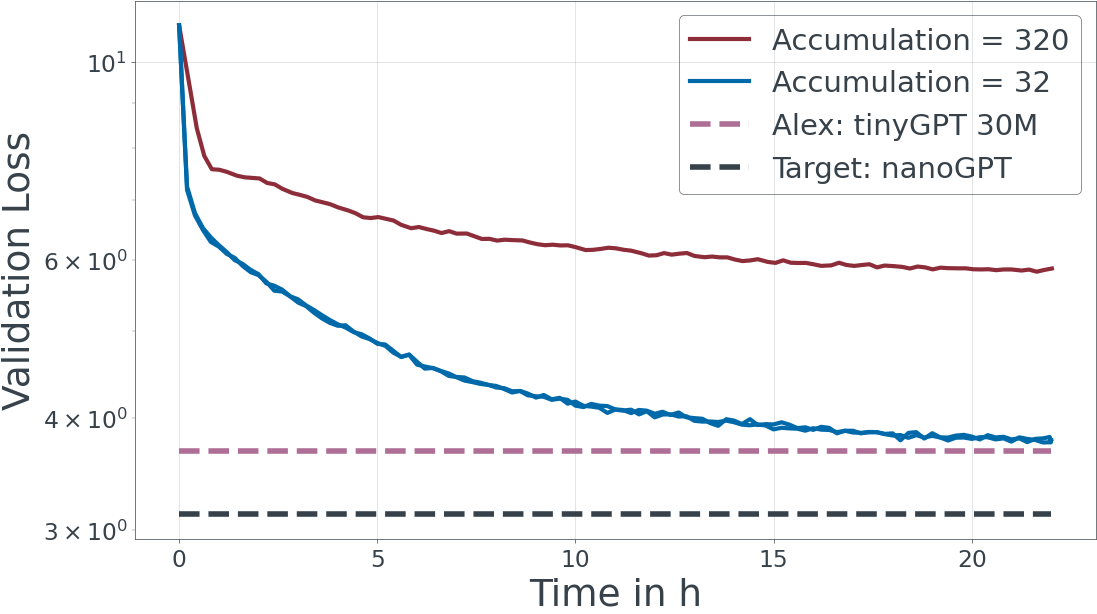

In [4]:
settings = bundles.beamer_moml(rel_width=2, rel_height=2)
factor = 3
settings['font.size'] = 9 * factor
settings['axes.labelsize'] = 9* factor
settings['legend.fontsize'] = 7* factor
settings['xtick.labelsize'] = 7* factor*0.8
settings['ytick.labelsize'] = 7* factor*0.8
settings['axes.titlesize'] = 9* factor
plt.rcParams.update(settings)

fig, ax = plt.subplots(1)


ax.plot(df_320_320_0_4_1024_0006_5["Time"] / 3600, df_320_320_0_4_1024_0006_5["Val Loss"], label="Accumulation = 320", color=rgb.tue_red, linewidth=3)

ax.plot(df_32_32_0_4_1024_0006_5["Time"] / 3600, df_32_32_0_4_1024_0006_5["Val Loss"], color=rgb.tue_blue, linewidth=3)
ax.plot(df_full_0_adamw_32_32_0_1_4_1024_0006_6["Time"] / 3600, df_full_0_adamw_32_32_0_1_4_1024_0006_6["Val Loss"], label="Accumulation = 32", color=rgb.tue_blue, linewidth=3)




ax.plot(np.arange(0, 23), np.ones_like(np.arange(0, 23)) * 3.677, label="Alex: tinyGPT 30M", linewidth=4, color=rgb.tue_violet, linestyle="dashed")
ax.plot(np.arange(0, 23), np.ones_like(np.arange(0, 23)) * 3.12, label="Target: nanoGPT", linewidth=4, color=rgb.tue_dark, linestyle="dashed")
ax.set_yscale("log")
ax.set_xlabel("Time in h")
ax.set_ylabel("Validation Loss")
ax.legend()
#ax.set_title("Gradient Accumulation Performance Comparison")
ax.grid()
plt.savefig("figs/AccCom.jpg")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

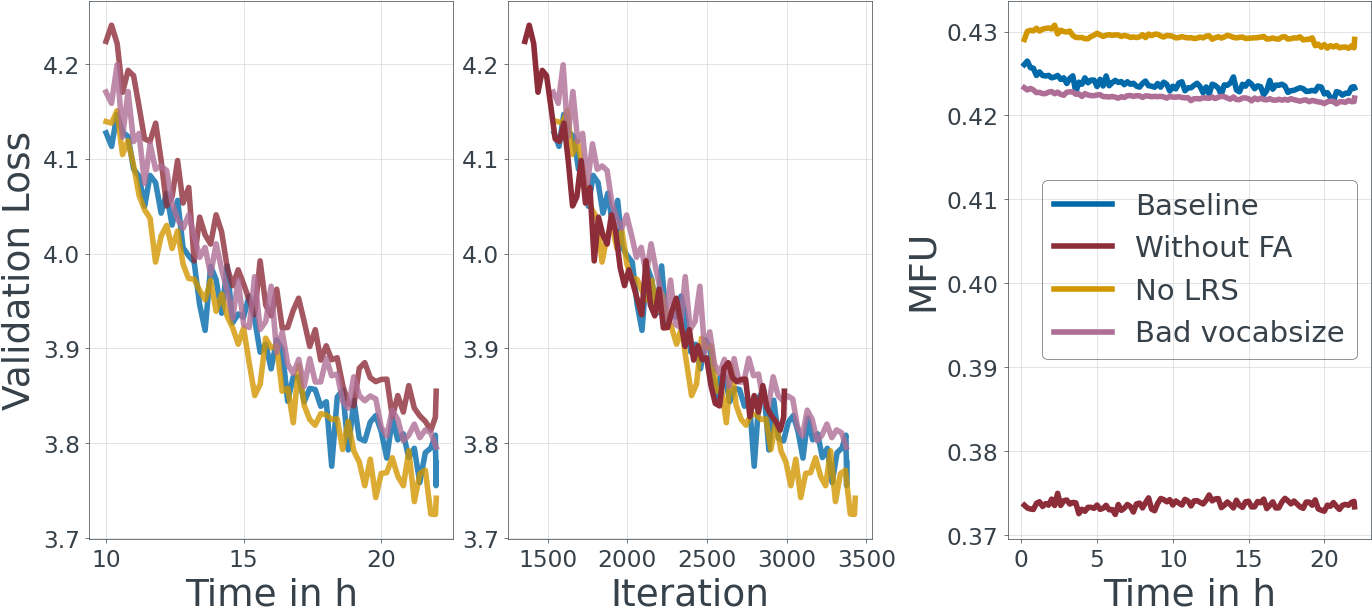

In [5]:
settings = bundles.beamer_moml(rel_width=2.5, rel_height=2)
factor = 3
settings['font.size'] = 9 * factor
settings['axes.labelsize'] = 9* factor
settings['legend.fontsize'] = 7* factor
settings['xtick.labelsize'] = 7* factor*0.8
settings['ytick.labelsize'] = 7* factor*0.8
settings['axes.titlesize'] = 9* factor
plt.rcParams.update(settings)

fig, axs = plt.subplots(1, 3)


axs[0].plot(df_32_32_0_4_1024_0006_5["Time"][50:] / 3600, df_32_32_0_4_1024_0006_5["Val Loss"][50:], label="Baseline", color=rgb.tue_blue, linewidth=4, alpha=0.8)

axs[0].plot(df_fa_full_0_adamw_32_32_0_1_4_1024_0006_00006_5["Time"][50:] / 3600, df_fa_full_0_adamw_32_32_0_1_4_1024_0006_00006_5["Val Loss"][50:], label="No Flash Attention", color=rgb.tue_red, linewidth=4, alpha=0.8)

axs[0].plot(df_lr_full_0_adamw_32_32_0_1_4_1024_0006_0006_5["Time"][50:] / 3600, df_lr_full_0_adamw_32_32_0_1_4_1024_0006_0006_5["Val Loss"][50:], label="No LRS", color=rgb.tue_orange, linewidth=4, alpha=0.8)

axs[0].plot(df_voc_full_0_adamw_32_32_0_1_4_1024_0006_00006_6["Time"][50:] / 3600, df_voc_full_0_adamw_32_32_0_1_4_1024_0006_00006_6["Val Loss"][50:], label="Bad vocabsize", color=rgb.tue_violet, linewidth=4, alpha=0.8)


axs[1].plot(df_32_32_0_4_1024_0006_5["Iteration"][50:], df_32_32_0_4_1024_0006_5["Val Loss"][50:], label="Baseline", color=rgb.tue_blue, linewidth=4, alpha=0.8)



axs[1].plot(df_lr_full_0_adamw_32_32_0_1_4_1024_0006_0006_5["Iteration"][50:], df_lr_full_0_adamw_32_32_0_1_4_1024_0006_0006_5["Val Loss"][50:], label="No LRS", color=rgb.tue_orange, linewidth=4, alpha=0.8)

axs[1].plot(df_voc_full_0_adamw_32_32_0_1_4_1024_0006_00006_6["Iteration"][50:], df_voc_full_0_adamw_32_32_0_1_4_1024_0006_00006_6["Val Loss"][50:], label="Bad vocabsize", color=rgb.tue_violet, linewidth=4, alpha=0.8)
axs[1].plot(df_fa_full_0_adamw_32_32_0_1_4_1024_0006_00006_5["Iteration"][50:], df_fa_full_0_adamw_32_32_0_1_4_1024_0006_00006_5["Val Loss"][50:], label="Without FA", color=rgb.tue_red, linewidth=4, alpha=1)


axs[2].plot(df_full_0_adamw_32_32_0_1_4_1024_0006_6["Time"][1:] / 3600, df_full_0_adamw_32_32_0_1_4_1024_0006_6["Train Loss"][1:], label="Baseline", color=rgb.tue_blue, linewidth=4)

axs[2].plot(df_fa_full_0_adamw_32_32_0_1_4_1024_0006_00006_5["Time"][1:] / 3600, df_fa_full_0_adamw_32_32_0_1_4_1024_0006_00006_5["Train Loss"][1:], label="Without FA", color=rgb.tue_red, linewidth=4)

axs[2].plot(df_lr_full_0_adamw_32_32_0_1_4_1024_0006_0006_5["Time"][1:] / 3600, df_lr_full_0_adamw_32_32_0_1_4_1024_0006_0006_5["Train Loss"][1:], label="No LRS", color=rgb.tue_orange, linewidth=4)

axs[2].plot(df_voc_full_0_adamw_32_32_0_1_4_1024_0006_00006_6["Time"][1:] / 3600, df_voc_full_0_adamw_32_32_0_1_4_1024_0006_00006_6["Train Loss"][1:], label="Bad vocabsize", color=rgb.tue_violet, linewidth=4)








#ax.plot(np.arange(0, 23), np.ones_like(np.arange(0, 23)) * 3.12, label="Target: nanoGPT", linewidth=6, color=rgb.tue_blue, linestyle="dashed")

axs[0].set_xlabel("Time in h")
axs[1].set_xlabel("Iteration")
axs[2].set_xlabel("Time in h")
axs[0].set_ylabel("Validation Loss")
axs[2].set_ylabel("MFU")
axs[2].legend()
#fig.suptitle("Ablations")
axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.savefig("figs/Ablation.jpg")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

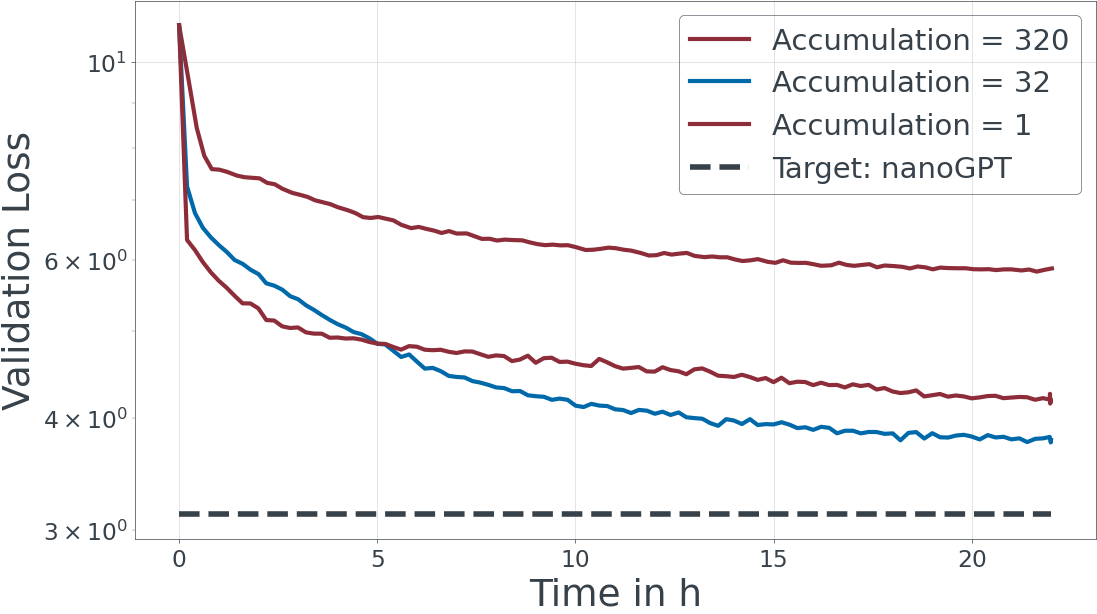

In [6]:
settings = bundles.beamer_moml(rel_width=2, rel_height=2)
factor = 3
settings['font.size'] = 9 * factor
settings['axes.labelsize'] = 9* factor
settings['legend.fontsize'] = 7* factor
settings['xtick.labelsize'] = 7* factor*0.8
settings['ytick.labelsize'] = 7* factor*0.8
settings['axes.titlesize'] = 9* factor
plt.rcParams.update(settings)

fig, ax = plt.subplots(1)

ax.plot(df_320_320_0_4_1024_0006_5["Time"] / 3600, df_320_320_0_4_1024_0006_5["Val Loss"], label="Accumulation = 320", color=rgb.tue_red, linewidth=3)

ax.plot(df_32_32_0_4_1024_0006_5["Time"] / 3600, df_32_32_0_4_1024_0006_5["Val Loss"], label="Accumulation = 32", color=rgb.tue_blue, linewidth=3)


ax.plot(df_1_1_0_4_1024_0006_5["Time"] / 3600, df_1_1_0_4_1024_0006_5["Val Loss"], label="Accumulation = 1", color=rgb.tue_red, linewidth=3)





ax.plot(np.arange(0, 23), np.ones_like(np.arange(0, 23)) * 3.12, label="Target: nanoGPT", linewidth=4, color=rgb.tue_dark, linestyle="dashed")
ax.set_yscale("log")
ax.set_xlabel("Time in h")
ax.set_ylabel("Validation Loss")
ax.legend()
#ax.set_title("Gradient Accumulation Performance Comparison")
ax.grid()
plt.savefig("figs/Gacc.jpg")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

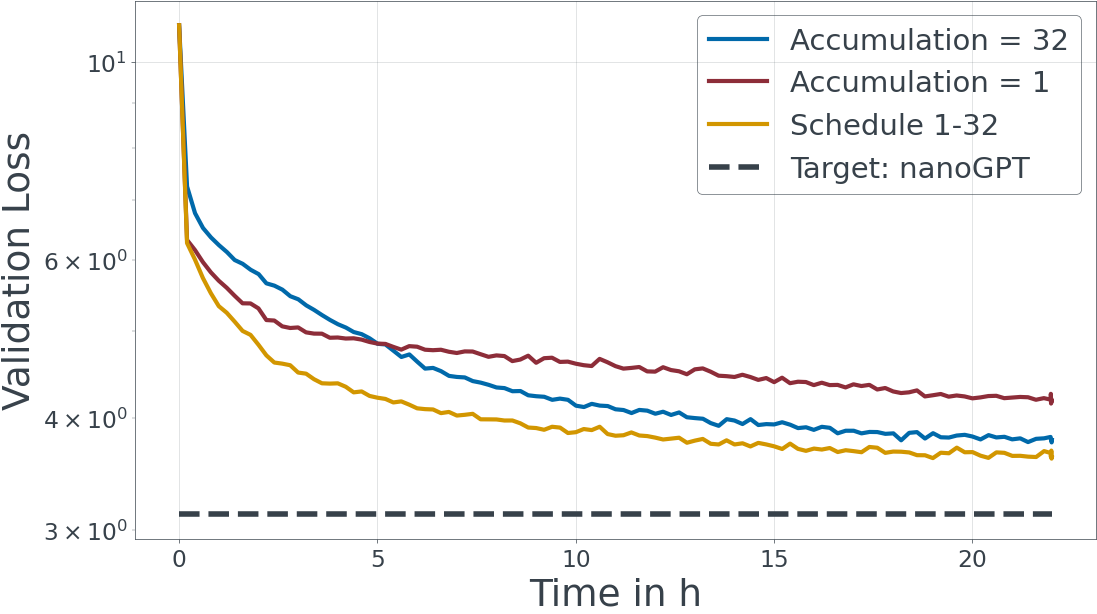

In [7]:
fig, ax = plt.subplots(1)


ax.plot(df_32_32_0_4_1024_0006_5["Time"] / 3600, df_32_32_0_4_1024_0006_5["Val Loss"], label="Accumulation = 32", color=rgb.tue_blue, linewidth=3)

ax.plot(df_1_1_0_4_1024_0006_5["Time"] / 3600, df_1_1_0_4_1024_0006_5["Val Loss"], label="Accumulation = 1", color=rgb.tue_red, linewidth=3)


ax.plot(df_1_32_0_4_1024_0006_5["Time"] / 3600, df_1_32_0_4_1024_0006_5["Val Loss"], label="Schedule 1-32", color=rgb.tue_orange, linewidth=3)


ax.plot(np.arange(0, 23), np.ones_like(np.arange(0, 23)) * 3.12, label="Target: nanoGPT", linewidth=4, color=rgb.tue_dark, linestyle="dashed")
ax.set_yscale("log")
ax.set_xlabel("Time in h")
ax.set_ylabel("Validation Loss")
ax.legend()
#ax.set_title("Gradient Accumulation Performance Comparison")
ax.grid()
plt.savefig("figs/BSS1.jpg")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

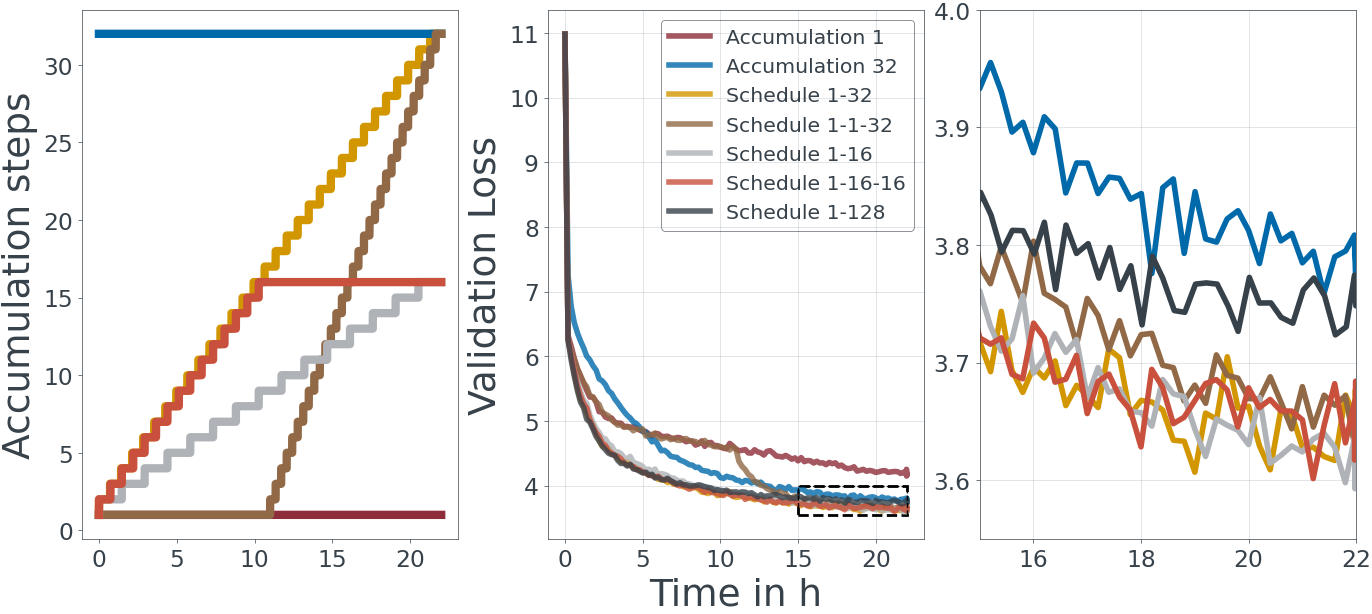

In [8]:
settings = bundles.beamer_moml(rel_width=2.5, rel_height=2)
factor = 3
settings['font.size'] = 9 * factor
settings['axes.labelsize'] = 9* factor
settings['legend.fontsize'] = 7* factor*0.7
settings['xtick.labelsize'] = 7* factor*0.8
settings['ytick.labelsize'] = 7* factor*0.8
settings['axes.titlesize'] = 9* factor
plt.rcParams.update(settings)
fig, axs = plt.subplots(1, 3)



axs[0].plot(np.arange(len(bs_1_32_0_25)) / len(bs_1_32_0_25) * 22, bs_1_32_0_0, linewidth=6, color=rgb.tue_orange)
axs[0].plot(np.arange(len(bs_1_32_0_25)) / len(bs_1_32_0_25) * 22, bs_1_1_0_0, linewidth=6, color=rgb.tue_red)
axs[0].plot(np.arange(len(bs_1_32_0_25)) / len(bs_1_32_0_25) * 22, bs_32_32_0_0, linewidth=6, color=rgb.tue_blue)
axs[0].plot(np.arange(len(bs_1_32_0_25)) / len(bs_1_32_0_25) * 22, bs_32_32_05_0, linewidth=6, color=rgb.tue_brown)
axs[0].plot(np.arange(len(bs_1_32_0_25)) / len(bs_1_32_0_25) * 22, bs_1_16_0_0, linewidth=6, color=rgb.tue_gray)
axs[0].plot(np.arange(len(bs_1_32_0_25)) / len(bs_1_32_0_25) * 22, bs_1_16_0_05, linewidth=6, color=rgb.tue_ocre)

axs[0].set_ylabel("Accumulation steps")

# Plot the full data on the first plot
axs[1].plot(df_1_1_0_4_1024_0006_5["Time"]/3600, df_1_1_0_4_1024_0006_5["Val Loss"], label="Accumulation 1", color=rgb.tue_red, linewidth=4, alpha=0.8)
axs[1].plot(df_32_32_0_4_1024_0006_5["Time"]/3600, df_32_32_0_4_1024_0006_5["Val Loss"], label="Accumulation 32", color=rgb.tue_blue, linewidth=4, alpha=0.8)
axs[1].plot(df_1_32_0_4_1024_0006_5["Time"]/3600, df_1_32_0_4_1024_0006_5["Val Loss"], label="Schedule 1-32", color=rgb.tue_orange, linewidth=4, alpha=0.8)
axs[1].plot(df_1_32_05_4_1024_0006_6["Time"]/3600, df_1_32_05_4_1024_0006_6["Val Loss"], label="Schedule 1-1-32", color=rgb.tue_brown, linewidth=4, alpha=0.8)
axs[1].plot(df_adamw_1_16_0_1_4_1024_0006_5["Time"]/3600, df_adamw_1_16_0_1_4_1024_0006_5["Val Loss"], label="Schedule 1-16", color=rgb.tue_gray, linewidth=4, alpha=0.8)
axs[1].plot(df_adamw_1_16_0_05_4_1024_0006_5["Time"]/3600, df_adamw_1_16_0_05_4_1024_0006_5["Val Loss"], label="Schedule 1-16-16", color=rgb.tue_ocre, linewidth=4, alpha=0.8)
axs[1].plot(df_1_128_0_4_1024_0006_5["Time"]/3600, df_1_128_0_4_1024_0006_5["Val Loss"], label="Schedule 1-128", color=rgb.tue_dark, linewidth=4, alpha=0.8)


# Indicating the zoomed-in area on the first plot
zoom_xlim = (15, 22)  # Specify the x-axis range for the zoomed-in area
zoom_ylim = (3.55, 4.0)    # Specify the y-axis range for the zoomed-in area
axs[1].add_patch(plt.Rectangle((zoom_xlim[0], zoom_ylim[0]), zoom_xlim[1] - zoom_xlim[0], zoom_ylim[1] - zoom_ylim[0], linewidth=2, edgecolor='black', facecolor='none', linestyle='--'))
axs[1].set_ylabel("Validation Loss")
axs[1].legend()
axs[1].set_xlabel("Time in h")
axs[1].grid()

# Plot the zoomed-in data on the second plot
axs[2].plot(df_32_32_0_4_1024_0006_5["Time"][-50:]/3600, df_32_32_0_4_1024_0006_5["Val Loss"][-50:], label="Accumulation 32", color=rgb.tue_blue, linewidth=4)
axs[2].plot(df_1_32_0_4_1024_0006_5["Time"][-50:]/3600, df_1_32_0_4_1024_0006_5["Val Loss"][-50:], label="Schedule 1-32", color=rgb.tue_orange, linewidth=4)
axs[2].plot(df_1_32_05_4_1024_0006_6["Time"][-50:]/3600, df_1_32_05_4_1024_0006_6["Val Loss"][-50:], label="Schedule 1-1-32", color=rgb.tue_brown, linewidth=4)
axs[2].plot(df_adamw_1_16_0_1_4_1024_0006_5["Time"][-56:]/3600, df_adamw_1_16_0_1_4_1024_0006_5["Val Loss"][-56:], label="Schedule 1-16", color=rgb.tue_gray, linewidth=4)
axs[2].plot(df_adamw_1_16_0_05_4_1024_0006_5["Time"][-55:]/3600, df_adamw_1_16_0_05_4_1024_0006_5["Val Loss"][-55:], label="Schedule 1-16-16", color=rgb.tue_ocre, linewidth=4)
axs[2].plot(df_1_128_0_4_1024_0006_5["Time"][-47:]/3600, df_1_128_0_4_1024_0006_5["Val Loss"][-47:], label="Schedule 1-128", color=rgb.tue_dark, linewidth=4)


# Highlighting the zoomed-in area with annotations
for xy, label in zip([(55, 45), (95, 5)], ["Start of Zoom", "End of Zoom"]):
    axs[1].annotate(label, xy=xy, xycoords='data', xytext=(-30, 30), textcoords='offset points',
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Lines to show the zoomed area
axs[1].plot([zoom_xlim[0], zoom_xlim[0]], [zoom_ylim[0], zoom_ylim[1]], "k--")
axs[1].plot([zoom_xlim[1], zoom_xlim[1]], [zoom_ylim[0], zoom_ylim[1]], "k--")
axs[1].plot([zoom_xlim[0], zoom_xlim[1]], [zoom_ylim[1], zoom_ylim[1]], "k--")

# Zoomed-in plot settings
axs[2].set_xlim(zoom_xlim)
axs[2].set_ylim(zoom_ylim)
#axs[2].set_ylabel("Validation Loss (Zoomed In)")
#axs[2].legend()
axs[2].grid()

#plt.show()
plt.savefig("figs/BSS2.jpg")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

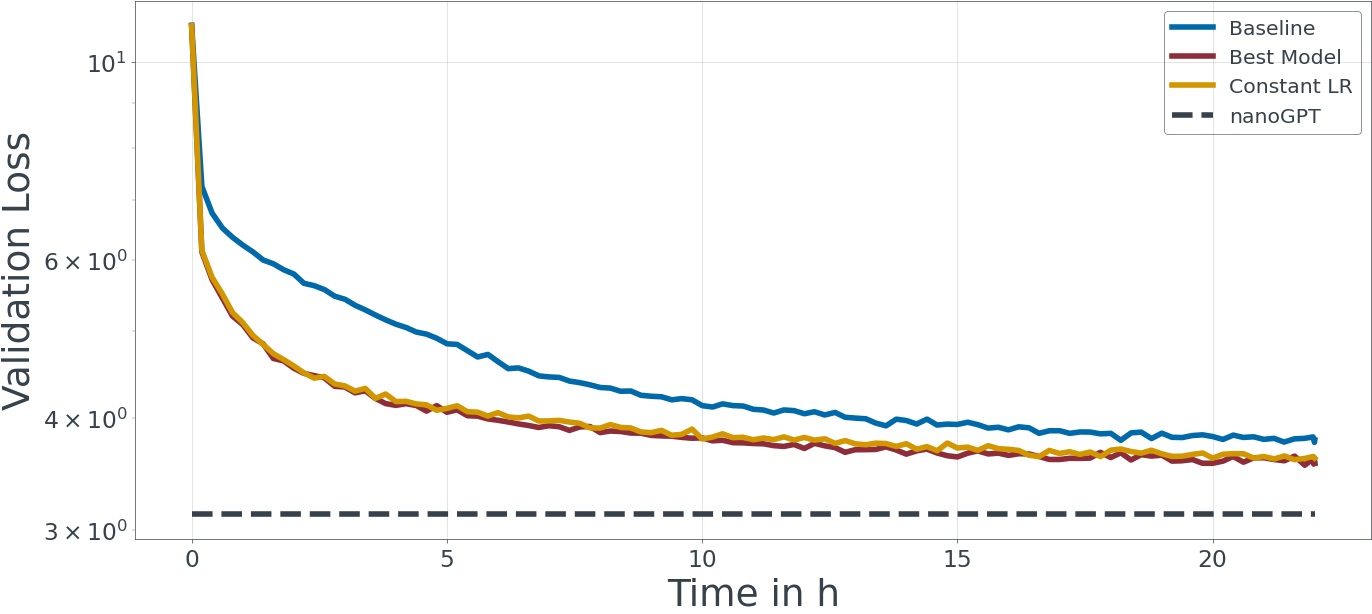

In [16]:
fig, axs = plt.subplots(1)

#df_full_0_adamw_1_32_0_1_12_512_0006_0006_5
axs.plot(df_32_32_0_4_1024_0006_5["Time"]/3600, df_32_32_0_4_1024_0006_5["Val Loss"], label="Baseline", color=rgb.tue_blue, linewidth=4)
axs.plot(df_adamw_1_32_0_1_12_512_0006_5["Time"] / 3600, df_adamw_1_32_0_1_12_512_0006_5["Val Loss"], label="Best Model", color=rgb.tue_red, linewidth=4, linestyle="solid")


axs.plot(df_full_0_adamw_1_32_0_1_12_512_0006_0006_5["Time"] / 3600, df_full_0_adamw_1_32_0_1_12_512_0006_0006_5["Val Loss"], label="Constant LR", color=rgb.tue_orange, linewidth=4, linestyle="solid")


axs.plot(np.arange(0, 23), np.ones_like(np.arange(0, 23)) * 3.12, label="nanoGPT", linewidth=4, color=rgb.tue_dark, linestyle="dashed")
axs.set_yscale("log")
axs.set_xlabel("Time in h")
axs.set_ylabel("Validation Loss")
axs.legend()
#axs[0].set_title("Gradient Accumulation Performance Comparison")
axs.grid()


plt.savefig("figs/noLRS.jpg")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

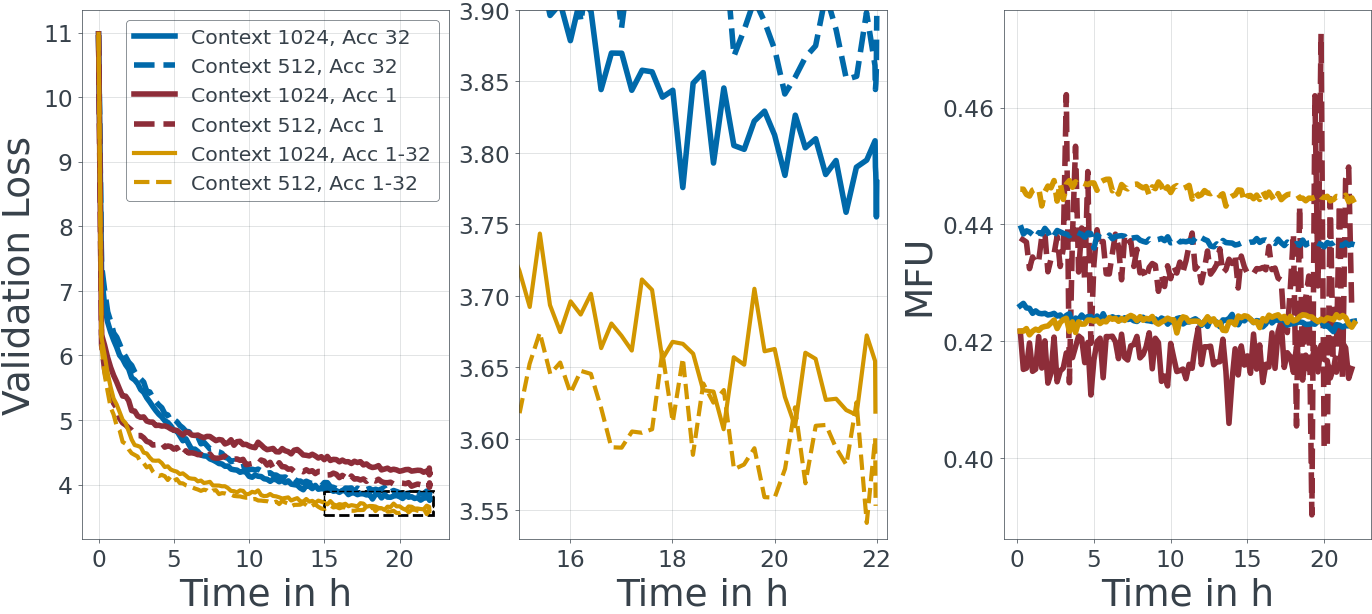

In [10]:
fig, axs = plt.subplots(1, 3)





# Plot the full data on the first plot
axs[0].plot(df_32_32_0_4_1024_0006_5["Time"] / 3600, df_32_32_0_4_1024_0006_5["Val Loss"], color=rgb.tue_blue, label="Context 1024, Acc 32", linewidth=4, linestyle="solid")
axs[0].plot(df_32_32_0_12_512_0006_5["Time"] / 3600, df_32_32_0_12_512_0006_5["Val Loss"], color=rgb.tue_blue, label="Context 512, Acc 32", linewidth=4, linestyle="dashed")
#ax.plot(df_adamw_32_32_0_1_12_512_0006_6["Time"] / 3600, df_adamw_32_32_0_1_12_512_0006_6["Val Loss"], color=rgb.tue_blue, linewidth=6, linestyle="dotted")

axs[0].plot(df_1_1_0_4_1024_0006_5["Time"] / 3600, df_1_1_0_4_1024_0006_5["Val Loss"], color=rgb.tue_red, label="Context 1024, Acc 1", linewidth=4, linestyle="solid")
axs[0].plot(df_1_1_0_12_512_0006_5["Time"] / 3600, df_1_1_0_12_512_0006_5["Val Loss"], color=rgb.tue_red, label="Context 512, Acc 1", linewidth=4, linestyle="dashed")
#ax.plot(df_adamw_1_1_0_1_12_512_0006_6["Time"] / 3600, df_adamw_1_1_0_1_12_512_0006_6["Val Loss"], color=rgb.tue_red, linewidth=6, linestyle="dotted")

axs[0].plot(df_1_32_0_4_1024_0006_5["Time"][:-4] / 3600, df_1_32_0_4_1024_0006_5["Val Loss"][:-4], color=rgb.tue_orange, label="Context 1024, Acc 1-32", linewidth=3, linestyle="solid")
axs[0].plot(df_adamw_1_32_0_1_12_512_0006_5["Time"][:-3] / 3600, df_adamw_1_32_0_1_12_512_0006_5["Val Loss"][:-3], color=rgb.tue_orange, label="Context 512, Acc 1-32", linewidth=3, linestyle="dashed")

# Indicating the zoomed-in area on the first plot
zoom_xlim = (15, 22.2)  # Specify the x-axis range for the zoomed-in area
zoom_ylim = (3.53, 3.9)    # Specify the y-axis range for the zoomed-in area
axs[0].add_patch(plt.Rectangle((zoom_xlim[0], zoom_ylim[0]), zoom_xlim[1] - zoom_xlim[0], zoom_ylim[1] - zoom_ylim[0], linewidth=2, edgecolor='black', facecolor='none', linestyle='--'))
axs[0].set_ylabel("Validation Loss")
axs[0].legend()
axs[0].set_xlabel("Time in h")
axs[0].grid()

# Plot the zoomed-in data on the second plot
axs[1].plot(df_32_32_0_4_1024_0006_5["Time"] / 3600, df_32_32_0_4_1024_0006_5["Val Loss"], color=rgb.tue_blue, label="Context 1024, Acc 32", linewidth=4, linestyle="solid")
axs[1].plot(df_32_32_0_12_512_0006_5["Time"] / 3600, df_32_32_0_12_512_0006_5["Val Loss"], color=rgb.tue_blue, label="Context 512, Acc 32", linewidth=4, linestyle="dashed")
#ax.plot(df_adamw_32_32_0_1_12_512_0006_6["Time"] / 3600, df_adamw_32_32_0_1_12_512_0006_6["Val Loss"], color=rgb.tue_blue, linewidth=6, linestyle="dotted")

axs[1].plot(df_1_1_0_4_1024_0006_5["Time"] / 3600, df_1_1_0_4_1024_0006_5["Val Loss"], color=rgb.tue_red, label="Context 1024, Acc 1", linewidth=4, linestyle="solid")
axs[1].plot(df_1_1_0_12_512_0006_5["Time"] / 3600, df_1_1_0_12_512_0006_5["Val Loss"], color=rgb.tue_red, label="Context 512, Acc 1", linewidth=4, linestyle="dashed")
#ax.plot(df_adamw_1_1_0_1_12_512_0006_6["Time"] / 3600, df_adamw_1_1_0_1_12_512_0006_6["Val Loss"], color=rgb.tue_red, linewidth=6, linestyle="dotted")

axs[1].plot(df_1_32_0_4_1024_0006_5["Time"][:-4] / 3600, df_1_32_0_4_1024_0006_5["Val Loss"][:-4], color=rgb.tue_orange, label="Context 1024, Acc 1-32", linewidth=3, linestyle="solid")
axs[1].plot(df_adamw_1_32_0_1_12_512_0006_5["Time"][:-3] / 3600, df_adamw_1_32_0_1_12_512_0006_5["Val Loss"][:-3], color=rgb.tue_orange, label="Context 512, Acc 1-32", linewidth=3, linestyle="dashed")




# Highlighting the zoomed-in area with annotations
for xy, label in zip([(55, 45), (95, 5)], ["Start of Zoom", "End of Zoom"]):
    axs[0].annotate(label, xy=xy, xycoords='data', xytext=(-30, 30), textcoords='offset points',
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Lines to show the zoomed area
axs[0].plot([zoom_xlim[0], zoom_xlim[0]], [zoom_ylim[0], zoom_ylim[1]], "k--")
axs[0].plot([zoom_xlim[1], zoom_xlim[1]], [zoom_ylim[0], zoom_ylim[1]], "k--")
axs[0].plot([zoom_xlim[0], zoom_xlim[1]], [zoom_ylim[1], zoom_ylim[1]], "k--")

# Zoomed-in plot settings
axs[1].set_xlim(zoom_xlim)
axs[1].set_ylim(zoom_ylim)
axs[1].set_xlabel("Time in h")
#axs[2].set_ylabel("Validation Loss (Zoomed In)")
#axs[2].legend()
axs[1].grid()


















axs[2].plot(df_full_0_adamw_1_1_0_1_4_1024_0006_6["Time"][1:-2] / 3600, df_full_0_adamw_1_1_0_1_4_1024_0006_6["Train Loss"][1:-2], label="Context 1024", color=rgb.tue_red, linewidth=4)
axs[2].plot(df_adamw_1_1_0_1_12_512_0006_6["Time"][1:-12] / 3600, df_adamw_1_1_0_1_12_512_0006_6["Train Loss"][1:-12], label="Context 512", color=rgb.tue_red, linewidth=4, linestyle="dashed")

axs[2].plot(df_full_0_adamw_32_32_0_1_4_1024_0006_6["Time"][1:-1] / 3600, df_full_0_adamw_32_32_0_1_4_1024_0006_6["Train Loss"][1:-1], color=rgb.tue_blue, linewidth=4)
axs[2].plot(df_adamw_32_32_0_1_12_512_0006_6["Time"][1:-4] / 3600, df_adamw_32_32_0_1_12_512_0006_6["Train Loss"][1:-4], color=rgb.tue_blue, linewidth=4, linestyle="dashed")

axs[2].plot(df_full_0_adamw_1_32_0_1_4_1024_0006_6["Time"][1:-1] / 3600, df_full_0_adamw_1_32_0_1_4_1024_0006_6["Train Loss"][1:-1], color=rgb.tue_orange, linewidth=4, linestyle="solid")
axs[2].plot(df_adamw_1_32_0_1_12_512_0006_5["Time"][1:-4] / 3600, df_adamw_1_32_0_1_12_512_0006_5["Train Loss"][1:-4], color=rgb.tue_orange, linewidth=4, linestyle="dashed")
# TODO axs[1].plot(df_full_0_adamw_1_32_0_1_5_1024_0006_00006_5["Time"][1:-4] / 3600, df_full_0_adamw_1_32_0_1_5_1024_0006_00006_5["Train Loss"][1:-4], color="black", linewidth=3, linestyle="solid")
#ax.set_yscale("log")
#axs[1].legend()
#axs[1].set_title("Validation Losses")
axs[2].set_xlabel("Time in h")
axs[2].grid()
axs[2].set_ylabel("MFU")

plt.savefig("figs/Context2.jpg")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

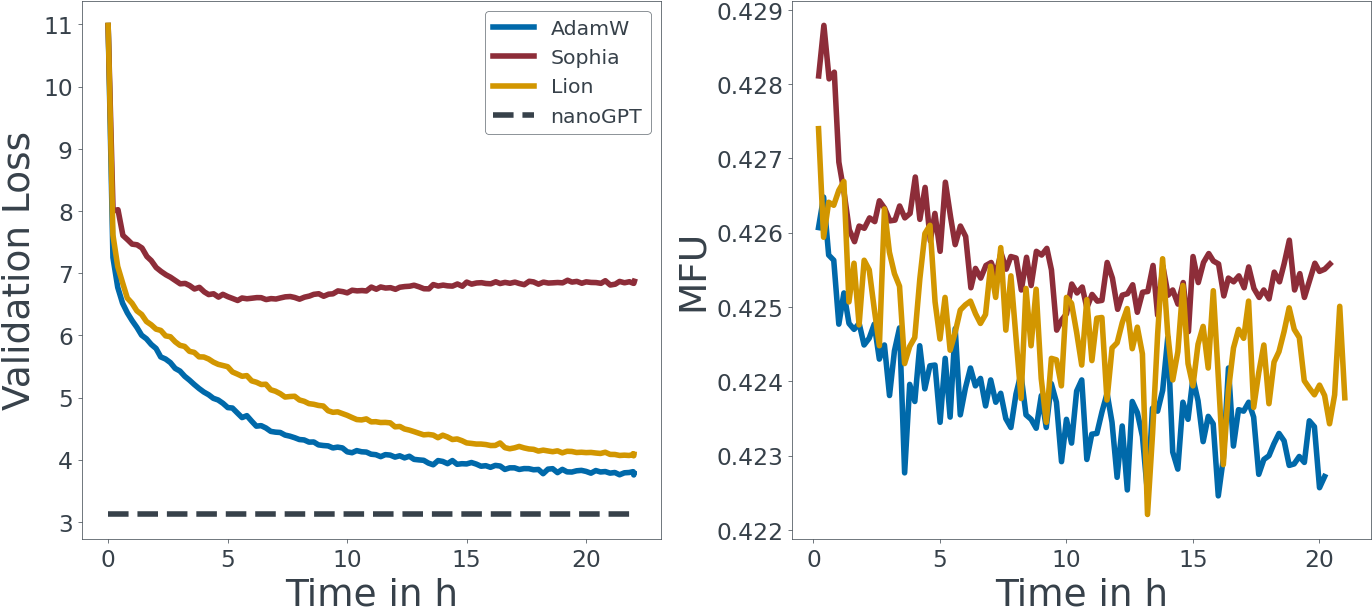

In [11]:
fig, axs = plt.subplots(1, 2)




axs[0].plot(df_32_32_0_4_1024_0006_5["Time"] / 3600, df_32_32_0_4_1024_0006_5["Val Loss"], label="AdamW", color=rgb.tue_blue, linewidth=4)
#axs[0].plot(df_sophia_1_32_0_1_4_1024_0006_5["Time"] / 3600, df_sophia_1_32_0_1_4_1024_0006_5["Val Loss"], label="Sophia", color=rgb.tue_red, linewidth=4)
axs[0].plot(df_sophia_128_128_0_1_4_1024_0006_5["Time"] / 3600, df_sophia_128_128_0_1_4_1024_0006_5["Val Loss"], label="Sophia", color=rgb.tue_red, linewidth=4)
axs[0].plot(df_lion_32_32_0_1_4_1024_0006_6["Time"] / 3600, df_lion_32_32_0_1_4_1024_0006_6["Val Loss"], label="Lion", color=rgb.tue_orange, linewidth=4)


axs[0].plot(np.arange(0, 23), np.ones_like(np.arange(0, 23)) * 3.12, label="nanoGPT", linewidth=4, color=rgb.tue_dark, linestyle="dashed")

axs[0].set_xlabel("Time in h")
axs[0].set_ylabel("Validation Loss")
axs[0].legend()

axs[0].grid()

axs[1].plot(df_full_0_adamw_32_32_0_1_4_1024_0006_6["Time"][1:-10] / 3600, df_full_0_adamw_32_32_0_1_4_1024_0006_6["Train Loss"][1:-10], label="AdamW", color=rgb.tue_blue, linewidth=4)
#axs[1].plot(df_sophia_1_32_0_1_4_1024_0006_5["Time"][1:-10] / 3600, df_sophia_1_32_0_1_4_1024_0006_5["Train Loss"][1:-10], label="Sophia", color=rgb.tue_red, linewidth=4)
axs[1].plot(df_sophia_128_128_0_1_4_1024_0006_5["Time"][1:-10] / 3600, df_sophia_128_128_0_1_4_1024_0006_5["Train Loss"][1:-10], label="Sophia", color=rgb.tue_red, linewidth=4)
axs[1].plot(df_lion_32_32_0_1_4_1024_0006_6["Time"][1:-10] / 3600, df_lion_32_32_0_1_4_1024_0006_6["Train Loss"][1:-10], label="Lion", color=rgb.tue_orange, linewidth=4)

axs[1].set_xlabel("Time in h")
axs[1].set_ylabel("MFU")

axs[0].grid()

plt.savefig("figs/Opt.jpg")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

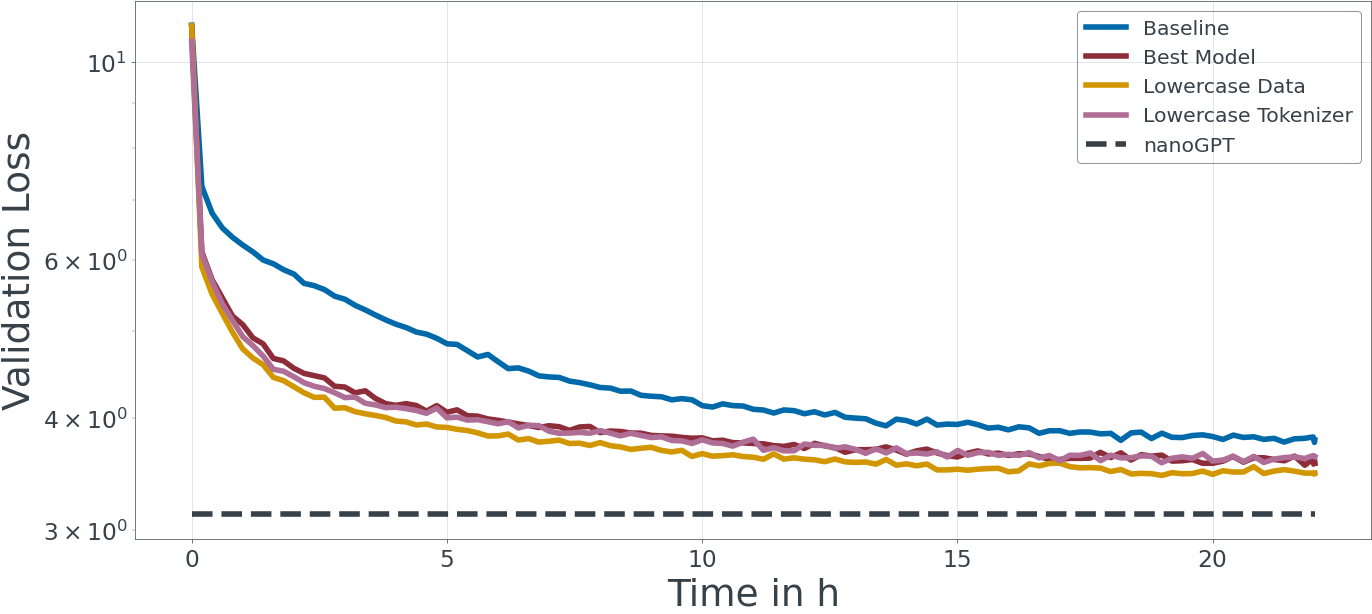

In [12]:
fig, ax = plt.subplots(1)

ax.plot(df_32_32_0_4_1024_0006_5["Time"] / 3600, df_32_32_0_4_1024_0006_5["Val Loss"], label="Baseline", color=rgb.tue_blue, linewidth=4)
ax.plot(df_adamw_1_32_0_1_12_512_0006_5["Time"] / 3600, df_adamw_1_32_0_1_12_512_0006_5["Val Loss"], color=rgb.tue_red, linewidth=4, label="Best Model")
ax.plot(df_ci_adamw_1_32_0_05_12_512_0006_5["Time"] / 3600, df_ci_adamw_1_32_0_05_12_512_0006_5["Val Loss"], color=rgb.tue_orange, linewidth=4, label="Lowercase Data")
ax.plot(df_ci_30592_adamw_1_32_0_1_16_512_0006_00006_5["Time"] / 3600, df_ci_30592_adamw_1_32_0_1_16_512_0006_00006_5["Val Loss"], color=rgb.tue_violet, linewidth=4, label="Lowercase Tokenizer")
df_ci_30592_adamw_1_32_0_1_16_512_0006_00006_5

ax.plot(np.arange(0, 23), np.ones_like(np.arange(0, 23)) * 3.12, label="nanoGPT", linewidth=4, color=rgb.tue_dark, linestyle="dashed")
ax.set_yscale("log")
ax.set_xlabel("Time in h")
ax.set_ylabel("Validation Loss")
ax.legend()
ax.grid()
plt.savefig("figs/LC.jpg")

In [17]:
import tiktoken
import torch

enc = tiktoken.get_encoding("gpt2")

test_output_best_model = [[  464, 37634,   705, 22089,  4673,  2267,  9592,     6,   561,   307,
          1257,   780,   339,   743,   761,   257, 11376, 31489,   329,   281,
         20798,    11,   475,   262,  2776,  2540,   284, 36177,   351,   644,
           339,   714,   290,   547,  9431,   339,   714,   530,  1110,  1445,
           656,   262,   995,    13,   357, 15001,   319,   883, 20136,    11,
           314,  4099,    11,   262,  4220,  1627,   714,   307, 15349,  7370,
            11,   290,  6164,   373,   991,  4632,  1336,    13,   887,   262,
         33779,  6304,   470,  7867,   284,   466,   523,   290,  1297,  2241,
           287,  2166,   286,   281,  5386,    11,   366,  1135,   389,   788,
          3599, 41878,   329,   340,    13,   775,   765,   284,   787,   340,
          1280,   284,   517,   661,   553,   290,   339,   373,   826,    13,
         10322,  3077,   262, 27737,  2156,   290,  3802,   290,   356,   477,
          2936, 11118,  5184,   291,  3360,   852,  2936,  3049,    13,   679,
           550,   477,   262,  7932,  1243,   339,   714,   307,  1804,  2952],
        [  464, 10861,  8946,  7696,   287, 30030,  4623,   268,   373,  3170,
           287,   262,  3931,   286,  1946,    13,   632,   550,   890,   587,
          5668,   287,  1688,  5372, 13091,    11,   925,   286, 36954,  6953,
         19338,  3101,  8573,  1863,   663,  3668, 21269,  3918, 35158,  3119,
           284, 11169, 49879,   286, 31388, 24063,  5006,   287,   262, 14115,
            12,    53,   516,   500,    13, 34459,  1386,   550,   587,  6027,
           287, 21199,  7229,   379,  1551,  1936,   812,  2084,    11, 11524,
           329,  5068,  4410,   319,  3210, 21866,  3227,    26,   287,  3006,
           351,   262,  9793,   286, 27239,    11,  8561,   329,  1509,   504,
           364,  1201,   262,  1903,  1528,   286,   262, 14446,   293,   854,
         37595,    11,   618,  1097,  9238,  6292,  1865,  1194,  3663,    26,
           393,   340,   468,   587,  5174,   355,   262, 16578,   283, 11717,
          4639,   290,   468,  2904, 15321,   262,  2975,  5296,   286,   262,
         12558,   402,   355,   262,   564,   250,    56,   695,   295,   284],
        [ 8496,   460,   345,  4483,   262,  1535,  6386,   290,   749, 12625,
          2057,    30,   198,   198,   464,  5916,   318,   262,  2003,   286,
          2057,    13, 11118, 44908,   423,   284,   651,   511,  2057,   284,
          4483,   329,   379,  1551,   257,  1178,  2745,   878,   674,  2995,
            13, 17877,  1838,   428,   780,   484,  1839,   447,   247,    83,
          7564,   262,  4931,   286, 25103,  2057,  1231,  2407,   852,  1498,
           284,  1394,   511, 20788,   329,  2057,    13,   198,   198,  3886,
           262,   886,   286,  2932,    11,  8211,  3862,  3751,   326,  1123,
          5807,   460,  1011,  2057,   329,  1936,  2250,   287,  1123,  1110,
            13,  1320,  1724,  6600,   281,  6672,   447,   247,    82, 21511,
         13840,    11, 13840,   290,   900,  4536,   329,  8073,   355,   880,
           355, 15896,   257,  1110,    13,  1318,   318,   645, 18772,   329,
          9965,    11,   290,   612,   389,   645, 21050,  8893,   284,  3613,
            13, 26383,  2269, 13533, 26600,    11,   257,   442, 19753,  5857],
        [43541,   301,   262, 30346,   286,   640,    11,   281,  6156, 32859,
          2540,   284,  1702,   262,  3496,   564,   250,   464,  2677,   286,
          4492,    11,   447,   251,  3194,   416, 25889,  2587,   416, 26319,
          1326, 25665,    11,  1757,   376,    13, 19935,    11, 31663,    11,
         41463, 18753,  6839,    11,   290,   262,  5932,  6620,   286,  4505,
           290,  4505,    13, 24581,   262,   905,    11, 17103,   318,  7173,
          3917,   351,   262, 18590,  2679, 13777,  3496,   564,   250,    41,
         32678,  4638,   260,    12, 23136,   805,    11,   447,   251,   290,
           318,   757,   257, 45795,   329,   262,  1790,    11, 12191,  7025,
            13,   383,  9154,   373,  6264,   739,   262,  2128,   286,  7367,
         39159,   447,   247,    82,  4318, 38762,   265,   586,    84,   290,
           262,  2128,   286, 29213,   388,  1855,  2290,    71,  1082, 37211,
           678,    13,   198,   198,   447,   250,  1212,   373,   262,  5265,
           357, 19399,  2032,  8083,     8,  3496,   326,  3181,   262,  8290]]


for i in range(4):
    print("##################")
    print(enc.decode(test_output_best_model[i]))

##################
The seminar 'deep learning research kitchen' would be fun because he may need a garden hose for an stew, but the relationship began to intersect with what he could and were convinced he could one day move into the world. (Based on those curiosity, I suspect, the bottom line could be 103 degrees, and mine was still mostly full. But the astronaut weren't inspired to do so and told himself in front of an audience, "We are then starting arranging for it. We want to make it open to more people," and he was right. Dubbed the sunny house and enter and we all felt Ky Avic sometimes being felt fast. He had all the wonderful things he could be doing quickly
##################
The golden gate bridge in Tuebingen was built in the summer of 2014. It had long been completed in majorplace furniture, made of rectangular iron hastening structures along its Earth Dial style waterproof property to restore poaching of VW 158 cars in the McDonald-Vousine. Purchases had been planned in So